In [1]:
import cv2
import pytesseract
import numpy as np
from tkinter import filedialog
import matplotlib.pyplot as plt
import os
plt.style.use('dark_background')

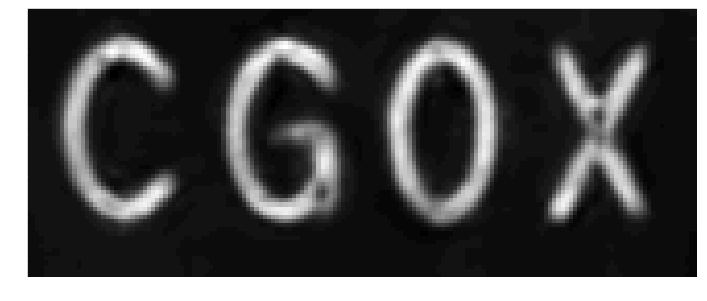

In [2]:
# img_path = filedialog.askopenfilename()
img_path = 'test.bmp'
filename = os.path.basename(img_path)
ori_img = cv2.imread(img_path)
img = ori_img.copy()

top_bottom_list, left_right_list = [], []

cv2.namedWindow('Select Window', cv2.WINDOW_NORMAL)
cv2.imshow('Select Window',img)

rect = cv2.selectROI('Select Window', img, fromCenter=False, showCrosshair=True)

left, top, w, h = [int(v) for v in rect]
right = left + w
bottom = top + h

top_bottom_list.append(np.array([top, bottom]))
left_right_list.append(np.array([left, right]))

cx = left + (w / 2)
cy = top + (h / 2)

img_cropped = cv2.getRectSubPix(img, patchSize=(int(w), int(h)), center=(int(cx), int(cy)))

result = cv2.rectangle(img, pt1=(left, top), pt2=(right, bottom), color=(255, 255, 255), thickness=3, lineType=cv2.LINE_AA)
height, width, channel = img_cropped.shape

grays = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)

gray = cv2.fastNlMeansDenoising(grays, None, 5, 13)

# img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
# 한글인식
# img_thresh = cv2.adaptiveThreshold(
#     gray, 
#     maxValue=255.0, 
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#     thresholdType=cv2.THRESH_BINARY, 
#     blockSize=19, 
#     C=9
# )

# img_thresh = cv2.adaptiveThreshold(
#     gray, 
#     maxValue=255.0, 
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
#     thresholdType=cv2.THRESH_BINARY_INV, 
#     blockSize=23, 
#     C=1
# )

# img_result = cv2.copyMakeBorder(img_thresh, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(255, 255, 255))
plt.figure(figsize=(12, 10))
# plt.imshow(img_result, cmap='gray')
plt.imshow(gray, cmap='gray')



CGOX


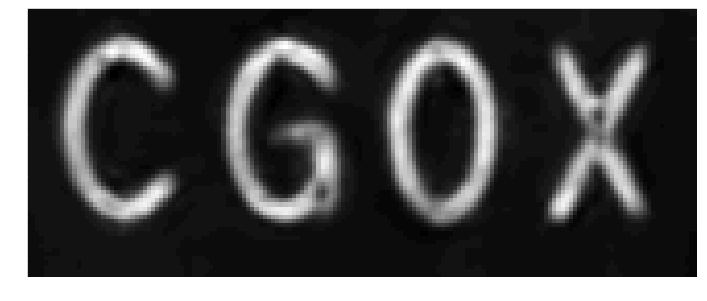

In [3]:


# print(pytesseract.image_to_string(gray))
longest_idx, longest_text = -1, 0
plate_chars = []
# 한글인식 pytesseract
# chars = pytesseract.image_to_string(gray, lang='eng', config='--psm 7 --oem 0')
# chars = pytesseract.image_to_string(gray)
# chars = pytesseract.image_to_string(gray, config = '-c tessedit_char_whitelist=0123456789')

# chars = pytesseract.image_to_string(gray, lang='eng', \
#            config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')

chars = pytesseract.image_to_string(gray, lang='eng', \
           config='--psm 7 --oem 0 -c )
result_chars = ''
has_digit = False


# 자동차 한글 및 숫자인식
# for c in chars:
#     if ord('가') <= ord(c) <= ord('힣') or c.isdigit():

#          if c.isdigit():
#             has_digit = True
#     result_chars += c
# print(result_chars)

for c in chars:
    if ord('a') <= ord(c) <= ord('Z') or c.isdigit():
         if c.isdigit():
            has_digit = True
    result_chars += c
print(result_chars) 
plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
#     if has_digit and len(result_chars) > longest_text:
#         longest_idx = i
#     if len(result_chars) > longest_text:
#         longest_idx = i

# plt.subplot(len(plate_imgs), 1, i+1)
# plt.imshow(img_result, cmap='gray')            

# plt.figure(figsize=(8, 6))
# plt.imshow(gray, cmap='gray')